In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio # We only need the Audio 'Class' from this package

# Class 5- DST Lab
## New York University

----

# Assignment 2

---

### Sine wave function

In [ ]:
sr = 48000

A = 1
fc = 220
phi = np.pi
length = 2

t_v = np.arange(0, length, 1/sr) 

my_sine = A * np.sin(2 * np.pi * fc * t_v + phi)

Audio(my_sine, rate = sr)

In [ ]:
def sine_gen(amplitude, frequency, phase, duration, sample_rate):
    t_v = np.arange(0, duration, 1/sample_rate) 
    output = amplitude * np.sin(2 * np.pi * frequency * t_v + phase)
    return output

In [ ]:
sr = 48000

sine1 = sine_gen(1, 220, 0, 2, sr)
sine2 = sine_gen(1, 440, 0, 2, sr)
sine3 = sine_gen(1, 660, 0, 2, sr)

Audio(sine1 + sine2 + sine3, rate = sr)

## Synthesizing complex waveforms through additive synthesis

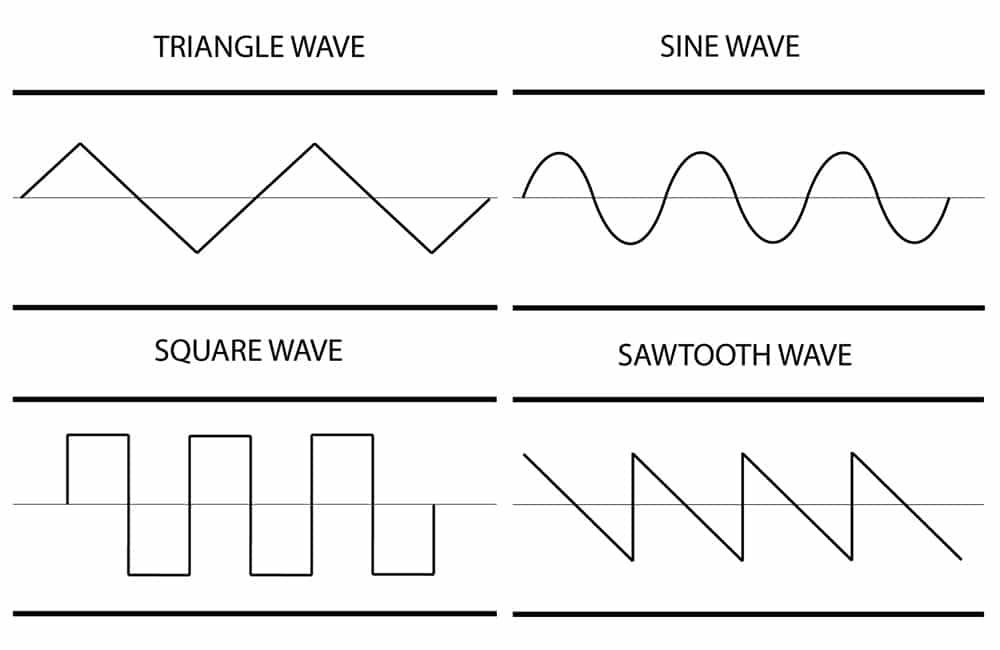

# Equation for a square wave
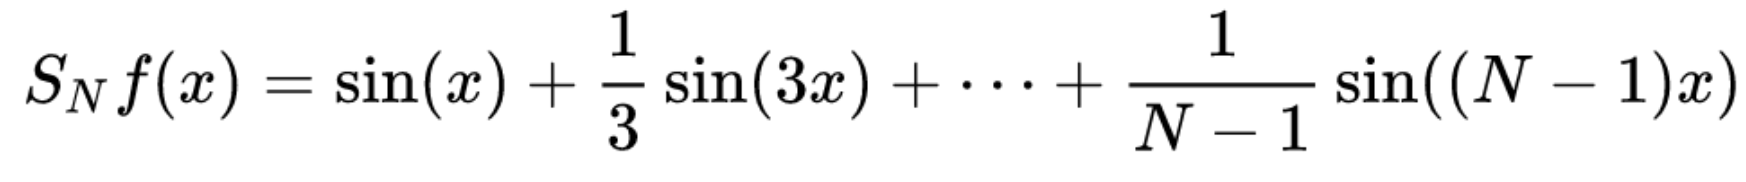

In [ ]:
# sine(f) + 1/3 sin(3f) + 1/5 sin(5f)......... up to infinity
# stop at nyquist frequency

In [ ]:
# 1. figure out what harmonics to generate
# 2. generate sine waves at each harmonic
# 3. add them together and listen!

# Squarewave - Odd number generator
- Create a loop that prints the sequence of odd numbers with length equal to the variable 'num_harmonics'
    - for example, if num_harmonics is 5, function will print, 1, 3, 5, 7, 9


In [ ]:
num_harmonics = 9

fundamental_freq = 220 # 100, 300, 500, 700 etc

curr_harmonic = 1

for i in range(num_harmonics):
    print(curr_harmonic * fundamental_freq) # generate sine wave at this freq and add to output array
    curr_harmonic += 2

In [ ]:
# extend function to print out frequency of each harmonic given a fundamental frequency

# Squarewave Generator function

Create a function that generates a squarewave based on the following input parameters:
- Amplitude
- f0: Fundamental frequency in Hertz
- Inital phase: In Radians
- duration: in seconds
- fs:Sampling Rate
- Number of harmonics


In [28]:
def square_gen(amplitude, frequency, phase, duration, sample_rate, num_harmonics):
    output = np.zeros(duration * sample_rate)
    
    curr_harmonic = 1
    for i in range(num_harmonics):
        # print(curr_harmonic * frequency) # generate sine wave at this freq and add to output array
        output += sine_gen(1/curr_harmonic, curr_harmonic * frequency, 0, duration, sample_rate)
        curr_harmonic += 2
    return output * amplitude

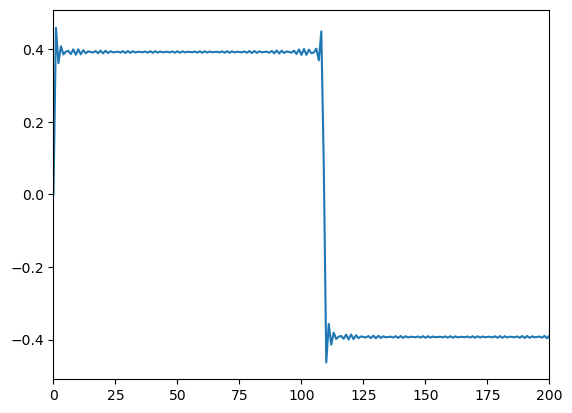

In [29]:
sr = 48000

square = square_gen(0.5, 220, 0, 2, sr, 60)

plt.plot(square)
plt.xlim(0, 200)
Audio(square, rate = sr)

# Sawtooth Wave Generator
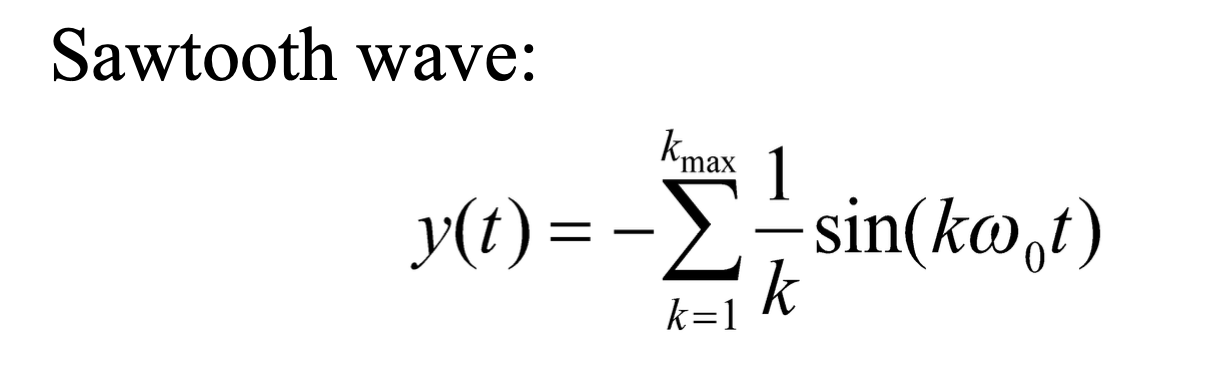

In [35]:
def saw_gen(amplitude, frequency, phase, duration, sample_rate, num_harmonics):
    output = np.zeros(duration * sample_rate)
    
    curr_harmonic = 1
    for i in range(num_harmonics):
        # print(curr_harmonic * frequency) # generate sine wave at this freq and add to output array
        output += sine_gen(1/curr_harmonic, curr_harmonic * frequency, 0, duration, sample_rate)
        curr_harmonic += 1
    return output * amplitude

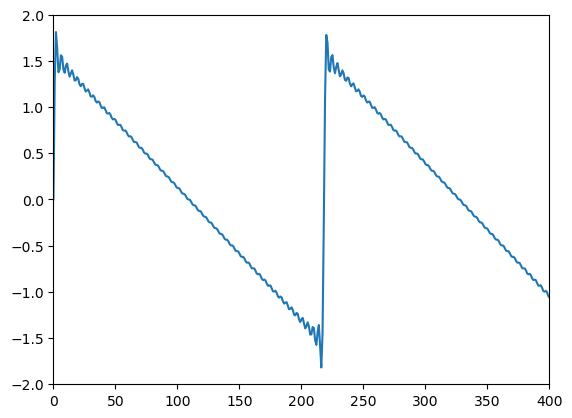

In [36]:
saw = saw_gen(1, 220, 0, 2, sr, 50)

plt.plot(saw)
plt.xlim(0, 400)
Audio(saw, rate = sr)

# Triangle Wave Generator
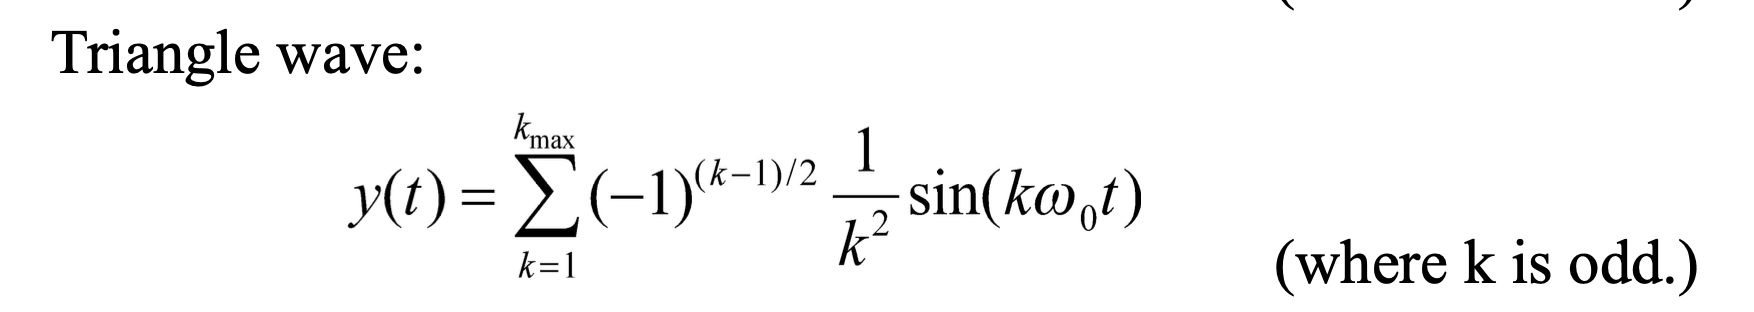

In [55]:
def triangle_gen(amplitude, frequency, phase, duration, sample_rate, num_harmonics):
    output = np.zeros(duration * sample_rate)
    
    curr_harmonic = 1
    for i in range(num_harmonics):
        curr_freq = curr_harmonic * frequency
        if( curr_freq < sample_rate / 2):
            # print(curr_harmonic * frequency) # generate sine wave at this freq and add to output array
            tri_sign = (-1) ** ((curr_harmonic - 1)/2)
            output +=  tri_sign * sine_gen(1/(curr_harmonic**2), curr_harmonic * frequency, 0, duration, sample_rate)
        curr_harmonic += 2
    return output * amplitude

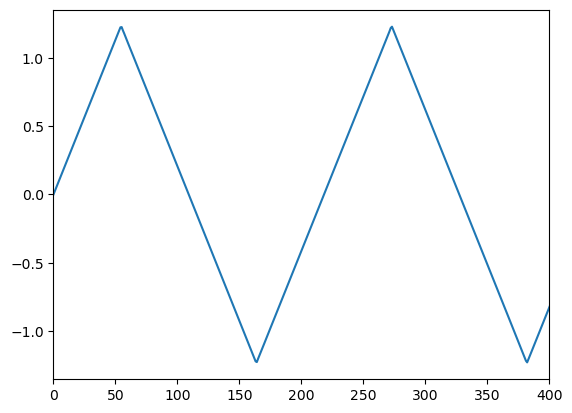

In [56]:
tri = triangle_gen(1, 220, 0, 2, sr, 100)

plt.plot(tri)
plt.xlim(0, 400)
Audio(tri, rate = sr)

# Task: Band-limit these generators so they don't try to generate any frequencies above Nyquist



# Additive Synth

Define an array of amplitudes of some num of harmonics

In [63]:
my_amps = [1, 0.5, 0, 1, 0, 0, 0, 1, 0.5, 1]

duration = 2
f0 = 220
output = np.zeros(duration * sr)

for i in range(len(my_amps)):
    my_amps[i] = np.random.rand()

for i in range(len(my_amps)):
    output += sine_gen(my_amps[i], i * f0, 0, duration, sr)
    
Audio(output, rate = sr)

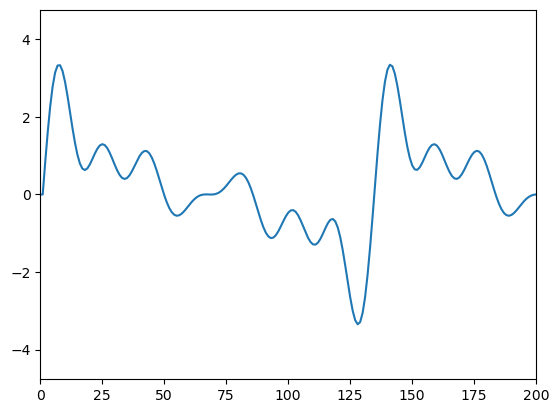

In [66]:
my_amps = [1, 0.5, 0, 0, 0, 0.5, 1, 1, 1]

length = 0.5
num_sections = 20

add = np.zeros(int(length*sr))
out = np.zeros(1)

f0 = 220
sr = 48000

for nn in range(num_sections):
    for i in range(len(my_amps)):
        my_amps[i] = np.random.rand()
        
    f0 = np.random.randint(100, 1000)

    for i in range(len(my_amps)):
        # print(my_amps[i])
        add = add + sine_gen(my_amps[i], f0 * i, 0, length, sr)
        
    out = np.append(out, add)
    add = np.zeros(int(length*sr))

    
    
plt.plot(out)
plt.xlim(0, 200)
Audio(out, rate = 48000)

# Wavetable Synthesis

### USING THE WAVETABLE

# Task, programming a melody